<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Tight-Binding Model in 1D__


### The Tight-Binding Model

The tight-binding model is a simplified framework for describing electron motion in solids by discretizing space. In this approach, the electron is restricted to occupy only atomic positions within a solid and can "hop" to neighboring sites due to quantum tunneling.

Consider a one-dimensional lattice of $N$ atoms spaced at intervals of $a$. The Hilbert space is $N$-dimensional, spanned by orthonormal position states $|n\rangle$ with $n = 1, 2, \dots, N$.

If the electron remains localized on a single atom, the system is governed by a Hamiltonian of the form:

$$
H_0 = E_0 \sum_n |n\rangle \langle n|
$$

Each state $|n\rangle$ is an eigenstate of $H_0$ with energy $E_0$, and no dynamics occur. To introduce motion, we incorporate quantum tunneling by allowing transitions between neighboring sites.

From time-dependent quantum mechanics, a general state evolves as:

$$
|\psi(t + \Delta t)\rangle = |\psi(t)\rangle - \frac{i\Delta t}{\hbar} H|\psi(t)\rangle + \mathcal{O}(\Delta t^2)
$$

### Periodic Boundary Conditions (PBC):  

To model hopping between sites $n$ and $m$, the Hamiltonian must include terms like $|m\rangle\langle n|$. We also enforce **locality**, meaning that hopping is allowed only between nearest neighbors.

The full tight-binding Hamiltonian (with Periodic Boundary Conditions) becomes:
$$
\boxed{H = E_0 \sum_{n=1}^N |n\rangle\langle n| - t \sum_{n=1}^N \left( |n\rangle\langle n+1| + |n+1\rangle\langle n| \right)}
\tag{2.1}
$$

Here, $t$ is the hopping amplitude, a real and positive parameter.

The Hamiltonian (2.1) assumes periodic boundary conditions, meaning that the lattice "wraps around" such that site $ N+1 $ is identified with site $ 1 $. This implies $ |N+1\rangle \equiv |1\rangle $, and thus hopping occurs between site $ N $ and site $ 1 $. PBC preserves translational symmetry, enabling the use of plane-wave eigenstates $ \psi_n \propto e^{ikna} $ and leading to the discrete quantization of wavenumber $ k $.


In matrix form, for a lattice of $N = 5$, the Hamiltonian looks like:

$$
H = 
\begin{pmatrix}
E_0 & -t & 0 & 0 & -t \\
-t & E_0 & -t & 0 & 0 \\
0 & -t & E_0 & -t & 0 \\
0 & 0 & -t & E_0 & -t \\
-t & 0 & 0 & -t & E_0 \\
\end{pmatrix}
$$

### Solving the Tight-Binding Model

To solve the eigenvalue problem for the Hamiltonian in Eq. (2.1), we consider a general quantum state:

$$
|\psi\rangle = \sum_m \psi_m |m\rangle
$$

Substituting into the time-independent Schrödinger equation $H|\psi\rangle = E|\psi\rangle$, we obtain:

$$
E_0 \sum_m \psi_m |m\rangle - t \sum_m \left( \psi_{m+1} |m\rangle + \psi_m |m+1\rangle \right) = E \sum_m \psi_m |m\rangle
$$

Projecting onto $\langle n|$, we find a set of coupled difference equations for the coefficients $\psi_n$:

$$
E_0 \psi_n - t(\psi_{n+1} + \psi_{n-1}) = E \psi_n
\tag{2.2}
$$

This linear recurrence relation is solved by the ansatz:

$$
\psi_n = e^{ikna}
\tag{2.3}
$$

or more precisely $\psi_n = \frac{1}{\sqrt{N}} e^{ikna}$ for normalized wavefunctions. Here, $k$ is the **wavenumber**, and $p = \hbar k$ acts analogously to momentum in the discrete model.


#### Brillouin Zone and Quantization

The solutions are periodic in $k$, meaning the wavefunction is invariant under $k \rightarrow k + 2\pi/a$. Therefore, allowed values of $k$ lie in the **first Brillouin zone**:

$$
k \in \left[ -\frac{\pi}{a}, +\frac{\pi}{a} \right]
\tag{2.4}
$$

Additionally, the periodic boundary condition $\psi_{N+1} = \psi_1$ imposes quantization of $k$ as:

$$
k = \frac{2\pi}{aN} m, \quad m \in \mathbb{Z}, \quad m = 0, 1, ..., N-1
$$

Hence, there are exactly $N$ distinct quantum states of the form (2.3).

Inserting this into Eq. (2.2), we obtain the energy dispersion relation:

$$
E(k) = E_0 - 2t \cos(ka)
\tag{2.5}
$$

This is the energy spectrum of the tight-binding model. It forms a **single energy band** with bandwidth $4t$, spanning the interval:

$$
E(k) \in [E_0 - 2t, E_0 + 2t]
$$


In [1]:
# Main Library
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [2]:
# Parameters
N = 100           # number of lattice sites
a = 1.0           # lattice spacing
t = 1.0           # hopping parameter
E0 = 2.0          # on-site energy

# Construct Hamiltonian matrix (N x N)
H = np.zeros((N, N), dtype=np.complex128)

In [3]:
# Fill diagonal and off-diagonal terms (Periodic Boundary Conditions)
for n in range(N):
    H[n, n] = E0                              # on-site energy
    H[n, (n + 1) % N] = -t                    # hopping to the right neighbor
    H[(n + 1) % N, n] = -t                    # hopping to the left neighbor (Hermitian)

# Diagonalize Hamiltonian
eigenvalues, eigenvectors = eigh(H)

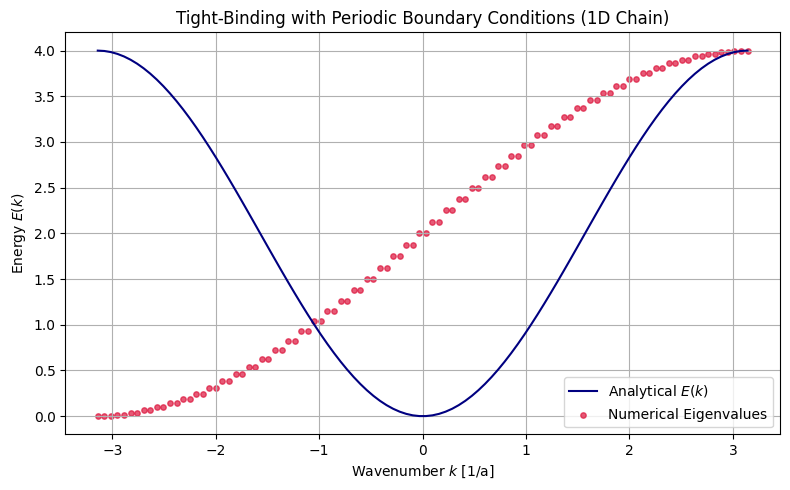

In [4]:
# Analytical band structure
k_vals = np.linspace(-np.pi / a, np.pi / a, N)
E_k_analytical = E0 - 2 * t * np.cos(k_vals * a)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_vals, E_k_analytical, label='Analytical $E(k)$', color='navy')
plt.scatter(k_vals, eigenvalues, 
            s=15, color='crimson', alpha=0.7, label='Numerical Eigenvalues')
plt.xlabel("Wavenumber $k$ [1/a]")
plt.ylabel("Energy $E(k)$")
plt.title("Tight-Binding with Periodic Boundary Conditions (1D Chain)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Open Boundary Conditions (OBC)

To model hopping between adjacent sites $ n $ and $ n+1 $, we include terms like $ |n\rangle\langle n+1| + |n+1\rangle\langle n| $ in the Hamiltonian. We enforce **locality**, meaning hopping is allowed only between nearest neighbors. However, **under open boundary conditions (OBC)**, there is **no connection between the first and last sites** — that is, no $ |1\rangle\langle N| $ or $ |N\rangle\langle 1| $.

The tight-binding Hamiltonian with **Open Boundary Conditions** is:

$$
\boxed{H = E_0 \sum_{n=1}^N |n\rangle\langle n| - t \sum_{n=1}^{N-1} \left( |n\rangle\langle n+1| + |n+1\rangle\langle n| \right)}
\tag{2.1'}
$$

Here, $ t $ is the hopping amplitude, a real and positive parameter.

Unlike periodic boundary conditions, OBC **breaks translational symmetry**. As a result, the energy eigenstates are no longer plane waves. Instead, they form **standing waves** due to the physical boundaries at both ends.

#### Boundary Conditions and Eigenstates

We impose $ \psi_0 = 0 $ and $ \psi_{N+1} = 0 $, analogous to a particle in a box. Solving the discrete Schrödinger equation:
$$
E \psi_n = E_0 \psi_n - t (\psi_{n+1} + \psi_{n-1})
$$
with the ansatz $ \psi_n = \sin(k n a) $, the condition $ \psi_{N+1} = 0 $ leads to:
$$
\sin(k (N+1) a) = 0 \quad \Rightarrow \quad k_m = \frac{m\pi}{(N+1)a}, \quad m = 1, 2, \dots, N
$$

The normalized eigenstates are:
$$
\psi_n^{(m)} = \sqrt{\frac{2}{N+1}} \sin(k_m n a)
$$

These are **standing wave** solutions, forming an orthonormal basis for the $ N $-dimensional Hilbert space.

#### Energy Spectrum

The corresponding energy eigenvalues are:
$$
E(k_m) = E_0 - 2t \cos(k_m a) = E_0 - 2t \cos\left( \frac{m\pi}{N+1} \right)
$$

This is the exact spectrum for a finite one-dimensional tight-binding chain with open ends.

#### Matrix Representation

In **matrix form**, for $ N = 5 $, the Hamiltonian becomes:

$$
H = 
\begin{pmatrix}
E_0 & -t & 0 & 0 & 0 \\
-t & E_0 & -t & 0 & 0 \\
0 & -t & E_0 & -t & 0 \\
0 & 0 & -t & E_0 & -t \\
0 & 0 & 0 & -t & E_0 \\
\end{pmatrix}
$$

This tridiagonal structure reflects nearest-neighbor hopping with no wrap-around, characteristic of open boundary conditions.


In [5]:
# Open boundary Hamiltonian (no hopping from last to first site)
H = np.zeros((N, N), dtype=np.complex128)

for n in range(N):
    H[n, n] = E0
    if n < N - 1:
        H[n, n + 1] = -t
        H[n + 1, n] = -t

# Diagonalize Hamiltonian
eigenvalues, eigenvectors = eigh(H)

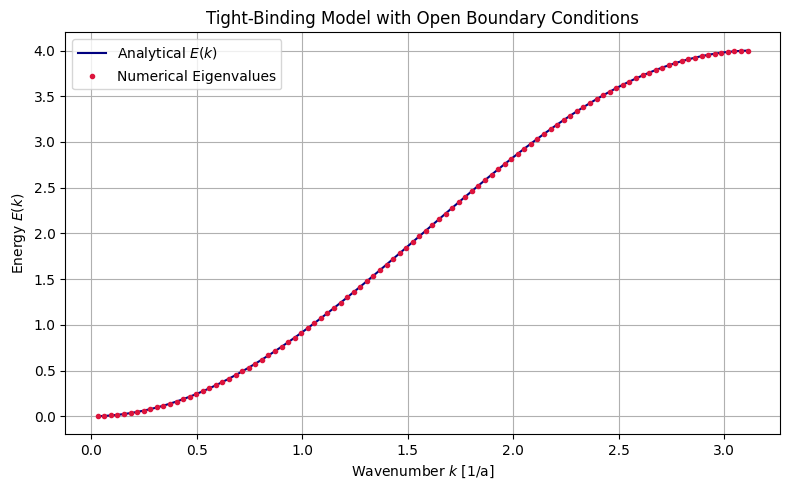

In [6]:
# Analytical eigenvalues (standing wave solution)
m_vals = np.arange(1, N + 1)
k_vals = m_vals * np.pi / ((N + 1) * a)
E_k_analytical = E0 - 2 * t * np.cos(k_vals * a)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_vals, E_k_analytical, label='Analytical $E(k)$', color='navy')
plt.plot(k_vals, eigenvalues, 'o', markersize=3, color='crimson',
         label='Numerical Eigenvalues')
plt.xlabel("Wavenumber $k$ [1/a]")
plt.ylabel("Energy $E(k)$")
plt.title("Tight-Binding Model with Open Boundary Conditions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---


### Key Physical Insights To remember

* **Delocalization of States:**
  The eigenstates $|n\rangle$ of $H_0$ are spatially localized. However, even an infinitesimal hopping parameter $t$ fully delocalizes the eigenstates across the entire lattice.

* **Lifting of Degeneracy:**
  The degeneracy of $H_0$ is broken by the hopping term. Each eigenstate is now labeled by a distinct wavenumber $k$, and the energy spectrum forms a continuous band.

* **Low-Energy Behavior:**
  For small $k \ll \pi/a$, we can expand Eq. (2.5) to second order:

  $$
  E(k) \approx E_0 - 2t + ta^2 k^2
  $$

  This resembles the energy of a free particle in the continuum:

  $$
  E_{\text{free}} = \frac{\hbar^2 k^2}{2m}
  \tag{2.6}
  $$

  Comparing the two, we define an **effective mass**:

  $$
  m^* = \frac{\hbar^2}{2ta^2}
  $$

  This effective mass arises from the lattice structure, not from the intrinsic electron mass.

* **Position-Momentum Duality:**
  Finite spatial domains enforce momentum quantization, as in a particle on a ring. Conversely, a discrete spatial structure implies that momentum becomes periodic. This interplay reflects the Fourier duality between spatial compactness and momentum discreteness.

